*Modelo de Clasificación con Regresión Logística para valores numéricos*    
Ailén de Barbará y Tomás Schiavonne - 4 TIC A


*IMPORTAR TODO LO NECESARIO*

In [1]:
!pip install opendatasets
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import BaggingClassifier

od.download("https://www.kaggle.com/c/titanic/data")
data = pd.read_csv('titanic/train.csv')
print(data.head())

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ailndebarbar
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 10.4MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


*MOSTRARLO EN FORMATO TABLA*

In [2]:
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

+----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|    |   PassengerId |   Survived |   Pclass | Name                                                | Sex    |   Age |   SibSp |   Parch | Ticket           |    Fare | Cabin   | Embarked   |
|----+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------|
|  0 |             1 |          0 |        3 | Braund, Mr. Owen Harris                             | male   |    22 |       1 |       0 | A/5 21171        |  7.25   | nan     | S          |
|  1 |             2 |          1 |        1 | Cumings, Mrs. John Bradley (Florence Briggs Thayer) | female |    38 |       1 |       0 | PC 17599         | 71.2833 | C85     | C          |
|  2 |             3 |          1 |        3 | Hei

*INDICAR LOS VALORES NUMERICOS Y LOS VALORES CATEGORICOS*

In [3]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

print("Atributos numéricos:", numerical_columns)
print("Atributos categóricos:", categorical_columns)

Atributos numéricos: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Atributos categóricos: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


*EXPLORACION DE DATOS (EDA)*

In [4]:
print(data.info())
print(data.describe())
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [5]:
# Valores nulos
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


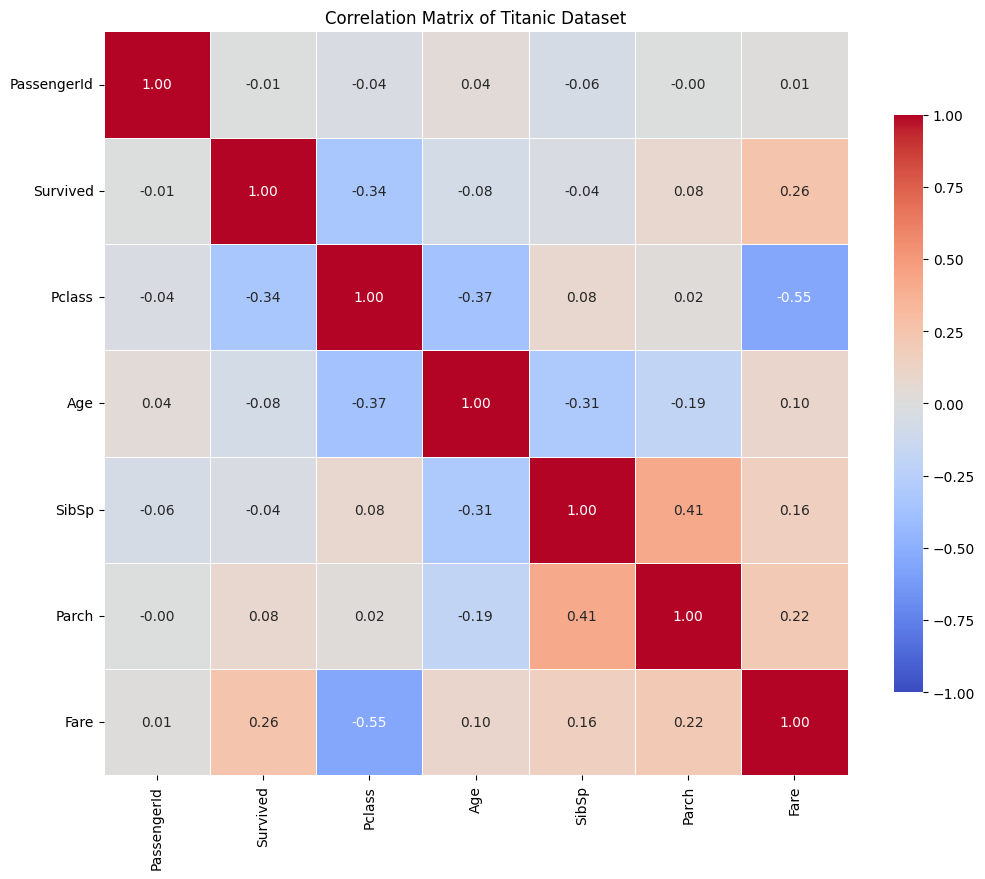

In [6]:
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
cm = numerical_columns.corr()

# Plotear la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
            cbar_kws={'shrink': .75}, square=True, linewidths=0.5)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

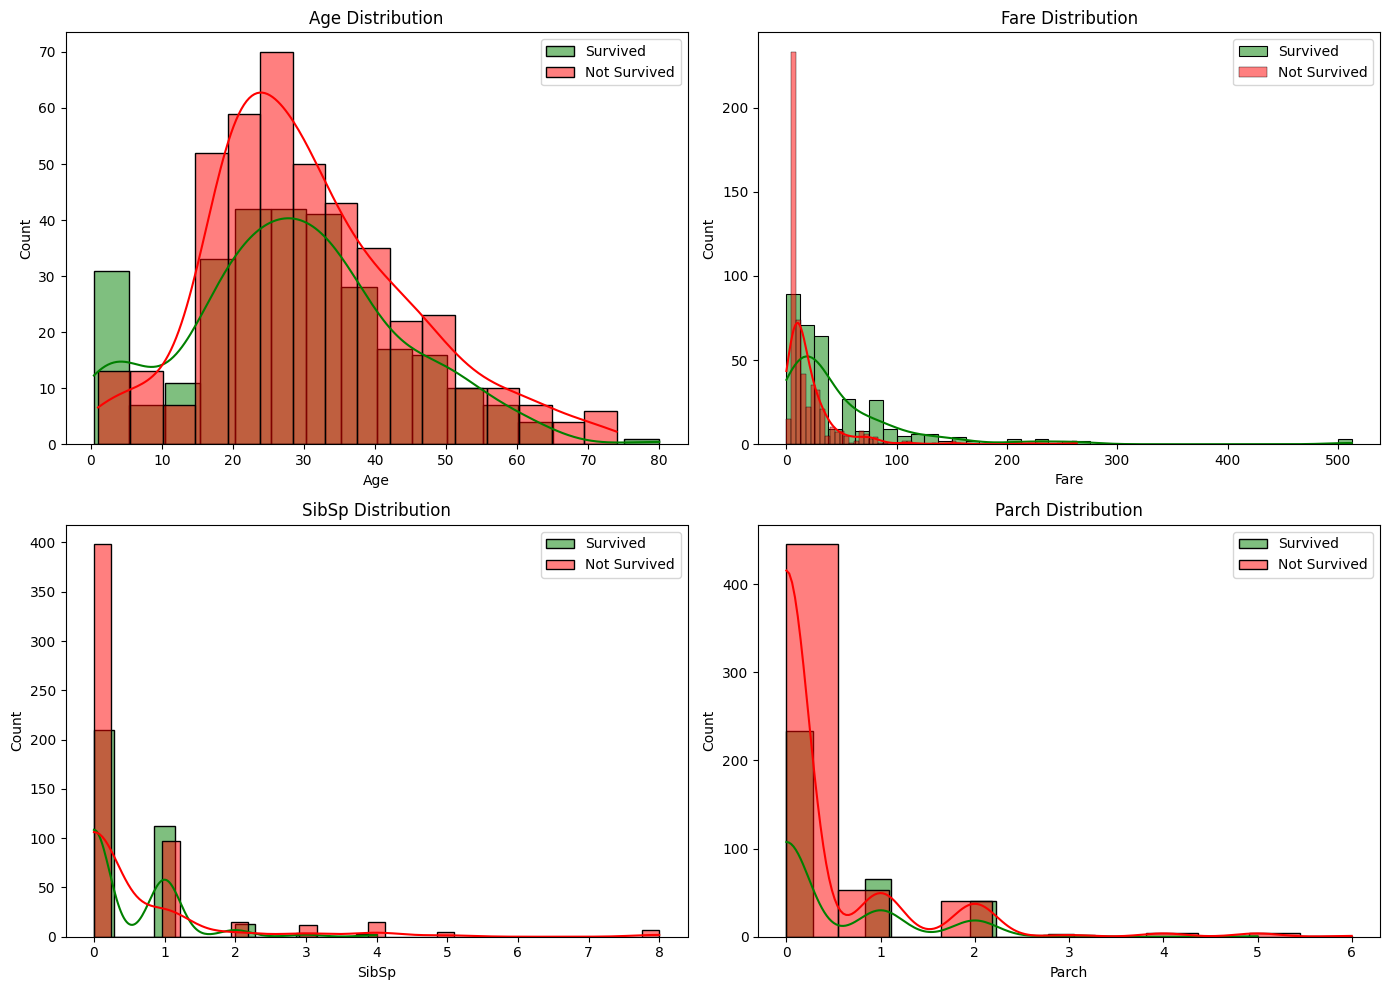

In [7]:
ds_survived = data[data["Survived"] == 1]
ds_not_survived = data[data["Survived"] == 0]

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Graficar la distribución de 'Age'
sns.histplot(ds_survived["Age"].dropna(), kde=True, color="green", ax=axs[0, 0], label="Survived")
sns.histplot(ds_not_survived["Age"].dropna(), kde=True, color="red", ax=axs[0, 0], label="Not Survived")
axs[0, 0].set_title("Age Distribution")
axs[0, 0].legend()

# Graficar la distribución de 'Fare'
sns.histplot(ds_survived["Fare"].dropna(), kde=True, color="green", ax=axs[0, 1], label="Survived")
sns.histplot(ds_not_survived["Fare"].dropna(), kde=True, color="red", ax=axs[0, 1], label="Not Survived")
axs[0, 1].set_title("Fare Distribution")
axs[0, 1].legend()

# Graficar la distribución de 'SibSp' (Número de hermanos/cónyuges a bordo)
sns.histplot(ds_survived["SibSp"], kde=True, color="green", ax=axs[1, 0], label="Survived")
sns.histplot(ds_not_survived["SibSp"], kde=True, color="red", ax=axs[1, 0], label="Not Survived")
axs[1, 0].set_title("SibSp Distribution")
axs[1, 0].legend()

# Graficar la distribución de 'Parch' (Número de padres/hijos a bordo)
sns.histplot(ds_survived["Parch"], kde=True, color="green", ax=axs[1, 1], label="Survived")
sns.histplot(ds_not_survived["Parch"], kde=True, color="red", ax=axs[1, 1], label="Not Survived")
axs[1, 1].set_title("Parch Distribution")
axs[1, 1].legend()

fig.tight_layout()
plt.show()

#TODO ESTO FUE SACADO DE TU CODIGO EN GITHUB

*MODELO DE CLASIFICACIÓN CON REGRESIÓN LOGÍSTICA*

In [8]:
# Cambiar la variable Sex a binario
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


In [9]:
# Seleccionar las columnas
subset = data[['Sex', 'Name']]
print(subset)

     Sex                                               Name
0      0                            Braund, Mr. Owen Harris
1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2      1                             Heikkinen, Miss. Laina
3      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4      0                           Allen, Mr. William Henry
..   ...                                                ...
886    0                              Montvila, Rev. Juozas
887    1                       Graham, Miss. Margaret Edith
888    1           Johnston, Miss. Catherine Helen "Carrie"
889    0                              Behr, Mr. Karl Howell
890    0                                Dooley, Mr. Patrick

[891 rows x 2 columns]


In [24]:
# Convertir el nombre en una representación numérica
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Name'])
y = data['Sex']

#Dividir la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (712, 1509)
X_test shape: (179, 1509)
y_train shape: (712,)
y_test shape: (179,)


In [11]:
#Crear el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

Evaluar el módelo (Métricas):
- Accuracy
- Confussion Matrix

In [12]:
#Verifica la Accuracy
Accuracy1 = f'Accuracy: {accuracy:.4f}'
print(Accuracy1)

Accuracy: 0.9944


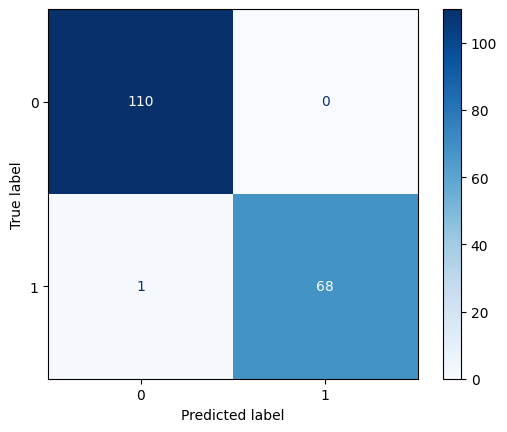

In [13]:
#Muestra la Confusion Matrix en un gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()

*COEFICIENTES DEL MODELO (CON ESCALADO)*

In [14]:
coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Crear un DataFrame para mostrar los coeficientes
coef_df = pd.DataFrame({'Titulo': feature_names, 'Coeficiente': coefficients})
coef_df['Coeficiente_Absoluto'] = np.abs(coef_df['Coeficiente'])
coef_df = coef_df.sort_values(by='Coeficiente_Absoluto', ascending=False)

print(coef_df.head(10))

      Titulo  Coeficiente  Coeficiente_Absoluto
1012      mr    -4.077567              4.077567
983     miss     3.827378              3.827378
1013     mrs     3.577560              3.577560
928   master    -2.021462              2.021462
1189     rev    -0.765401              0.765401
354       dr    -0.755687              0.755687
264      col    -0.385632              0.385632
882    major    -0.384904              0.384904
415     emma     0.368151              0.368151
988     mlle     0.367786              0.367786


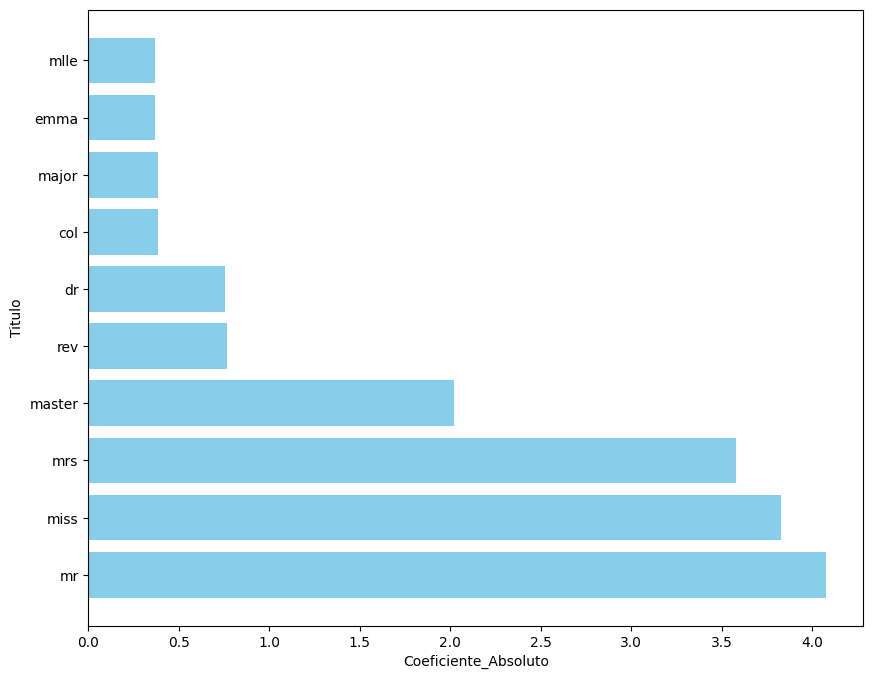

In [26]:
coef_head = coef_df.head(10)

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 8))
ax.barh(coef_head['Titulo'], coef_head['Coeficiente_Absoluto'], color='skyblue')
ax.set_xlabel('Coeficiente_Absoluto')
ax.set_ylabel('Titulo')
plt.show()

*EVALUACIÓN DE PERFORMANCE CON ROC AUC*

In [16]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [18]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9997364953886693


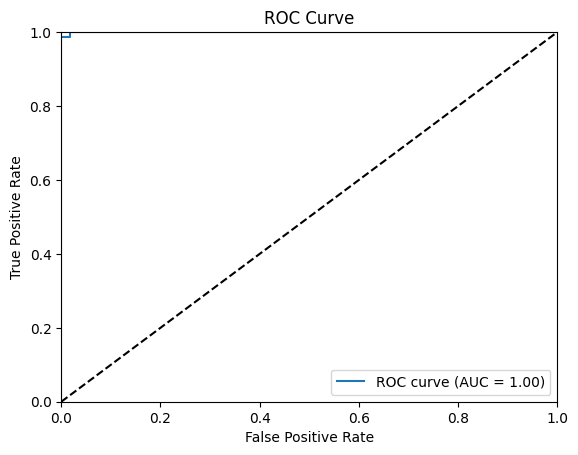

In [19]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

*MOSTRAR "FEATURE IMPORTANCE"*

In [20]:
# Obtenemos los coeficientes
coefficients = model.coef_[0]
num_features = coefficients.shape[0]

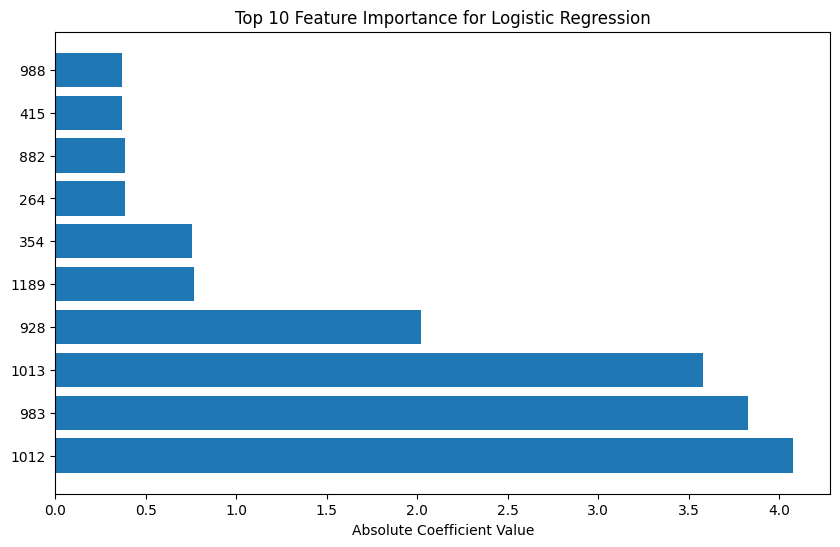

In [27]:
# Indices de los coeficientes
feature_indices = np.arange(num_features)
sorted_idx = np.argsort(np.abs(coefficients))

# Top 10
top_n = 10
sorted_idx_top = sorted_idx[-top_n:]
sorted_idx_top = sorted_idx_top[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), np.abs(coefficients[sorted_idx_top]), align='center')
plt.yticks(range(top_n), feature_indices[sorted_idx_top])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 10 Feature Importance for Logistic Regression')
plt.show()

*BONUS* --> *BAGGING*

In [22]:
logistic_regression = LogisticRegression(max_iter=1000)

bagging_clf = BaggingClassifier(
    estimator=logistic_regression,
    n_estimators=50,
    random_state=42
)

In [23]:
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión con Bagging: {accuracy:.2f}')

Precisión con Bagging: 0.99
